# Avacado Ripeness Classification Project

###### Hass avocado is a popular variety of avocado known for its distinctive pebbly, dark green to black skin and creamy, buttery flesh when ripe. It's a large fruit, and is the most common commercial variety globally.

###### A synthetic dataset simulating measurements designed for a classification task in predicting avocado ripeness stages using physical characteristics.

*****Import the basic necessary libraries*****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*****Load the dataset*****

In [2]:
avacado = pd.read_csv("AvocadoRipeness_dataset.csv")

*****EDA of Data*****

In [3]:
avacado.shape

(240, 9)

In [4]:
avacado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        240 non-null    float64
 1   hue             240 non-null    int64  
 2   saturation      240 non-null    int64  
 3   brightness      240 non-null    int64  
 4   color_category  240 non-null    object 
 5   sound_db        240 non-null    int64  
 6   weight_g        240 non-null    int64  
 7   size_cm3        240 non-null    int64  
 8   ripeness        240 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.0+ KB


In [5]:
avacado.head()

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking


In [6]:
# Check for missing values
avacado.isnull().sum()

firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64

*****Data Visualizations*****

In [7]:
# Visualizing Ripeness Distribution

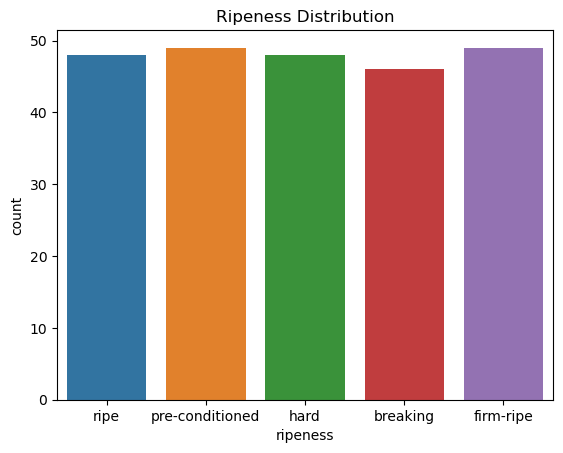

In [8]:
sns.countplot(data = avacado, x = 'ripeness',hue = 'ripeness')
plt.title("Ripeness Distribution")
plt.show()

In [9]:
# Boxplot of firmness by ripeness

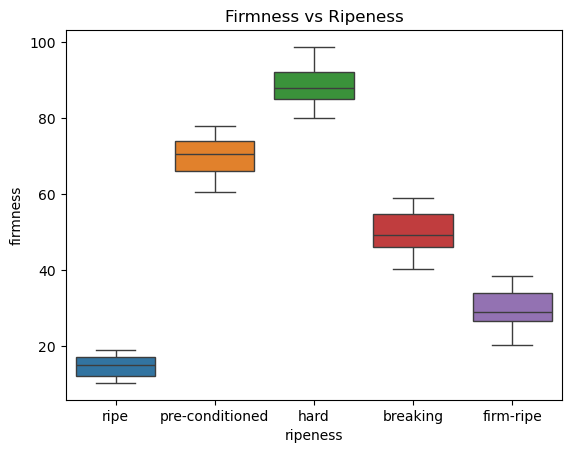

In [10]:
sns.boxplot(data = avacado, x = 'ripeness', y = 'firmness', hue = 'ripeness')
plt.title("Firmness vs Ripeness")
plt.show()

In [11]:
# Boxplot of brightness by ripeness

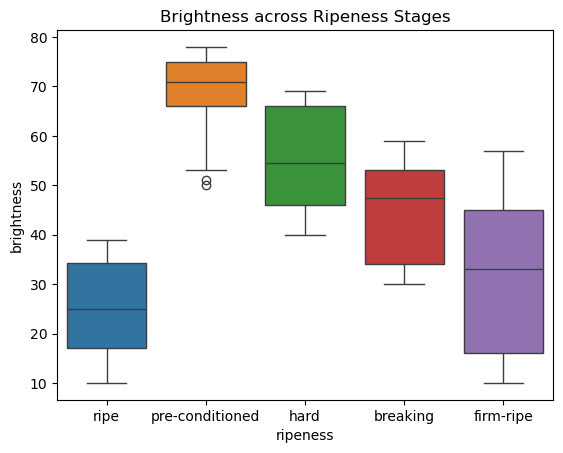

In [12]:
sns.boxplot(x='ripeness', y='brightness', data=avacado, hue = 'ripeness')
plt.title("Brightness across Ripeness Stages")
plt.show()

In [13]:
# Violin Plot

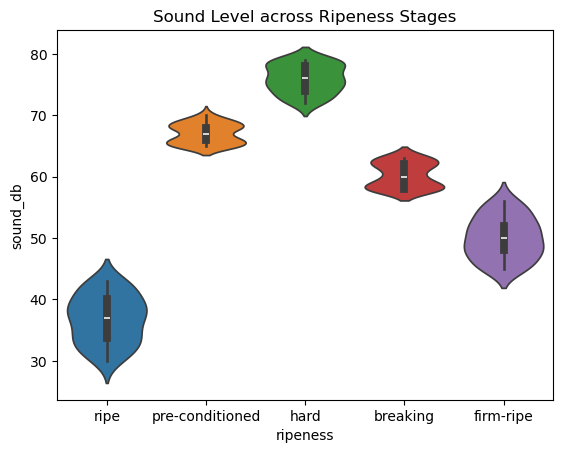

In [14]:
sns.violinplot(x='ripeness', y='sound_db', data=avacado, hue = 'ripeness')
plt.title("Sound Level across Ripeness Stages")
plt.show()

In [15]:
# Count plot for Color of avacados

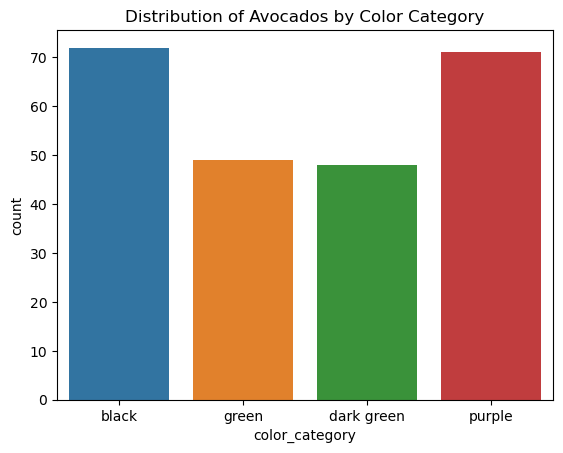

In [16]:
sns.countplot(x='color_category', data=avacado, hue = "color_category")
plt.title("Distribution of Avocados by Color Category")
plt.show()

In [17]:
# Heatmap of Feature Correlations

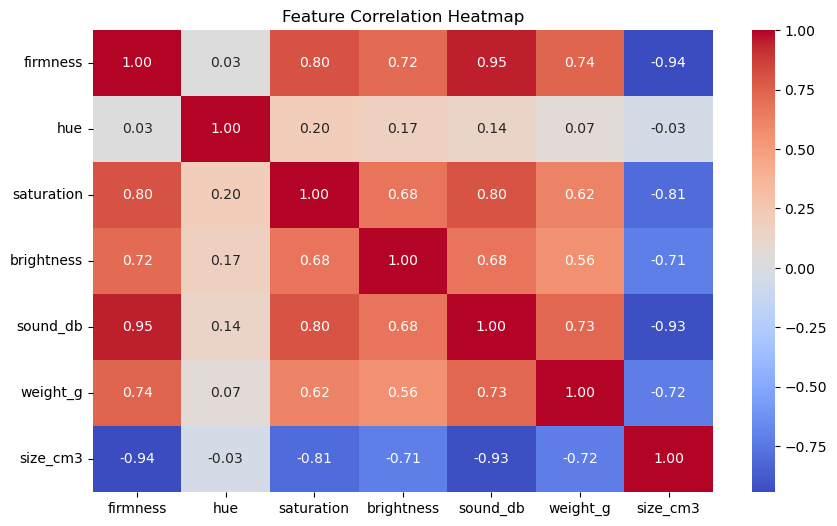

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(avacado.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


*****Data Preprocessing*****

******1. Label Encoding******

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
avacado['color_category'] = le.fit_transform(avacado['color_category'])

In [22]:
avacado['ripeness'] = le.fit_transform(avacado['ripeness'])

******2. Feature Selection******

In [23]:
X = avacado.drop("ripeness", axis = 1)
y = avacado["ripeness"]

******3. Scale Numerical Features******

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
x = scaler.fit_transform(X)

******4. Splitting the data******

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [29]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

*****Classification Models*****

******1. Logistic Regression Classifier******

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression(max_iter = 1000)

In [32]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
y_pred_lr = lr.predict(x_test)

******2. Random Forest Classifier******

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(random_state = 42)

In [36]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred_rf = rf.predict(x_test)

******3. K-Nearest Neighbors******

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [40]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred_knn = knn.predict(x_test)

******4. Support Vector Machine******

In [42]:
from sklearn.svm import SVC

In [43]:
svc = SVC(kernel='rbf', probability=True)

In [44]:
svc.fit(x_train, y_train)

SVC(probability=True)

In [45]:
y_pred_svc = svc.predict(x_test)

*****Model Evaluation*****

##### Common function to evaluate models
######  1. classification report
######   2. accuracy score
######   3. confusion matrix

In [46]:
from sklearn.metrics import classification_report

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
from sklearn.metrics import confusion_matrix

###### Logistic Regression

Logistic Regression Evaluation:
Accuracy: 0.9583333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.83      0.91        12
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         7
           4       0.83      1.00      0.91        10

    accuracy                           0.96        48
   macro avg       0.97      0.97      0.96        48
weighted avg       0.97      0.96      0.96        48



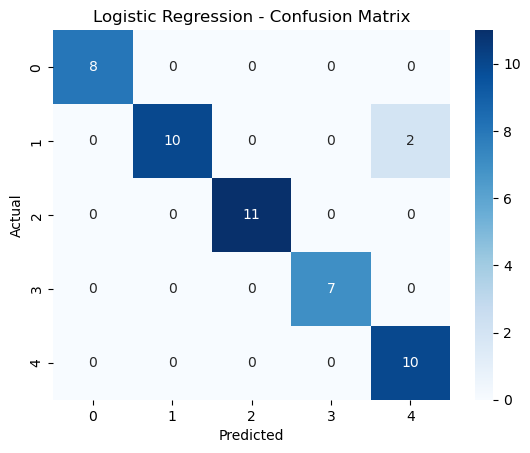

In [49]:
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###### Random Forest Classifier

Random Forest Evaluation:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



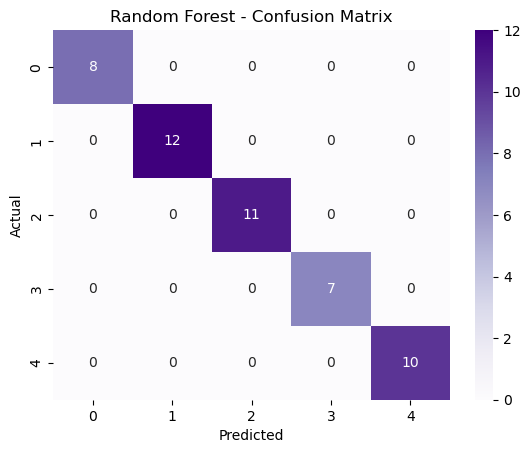

In [50]:
print("Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Purples')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###### K-Nearest Neighbors

KNN Evaluation:
Accuracy: 0.9583333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.83      0.91        12
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         7
           4       0.83      1.00      0.91        10

    accuracy                           0.96        48
   macro avg       0.97      0.97      0.96        48
weighted avg       0.97      0.96      0.96        48



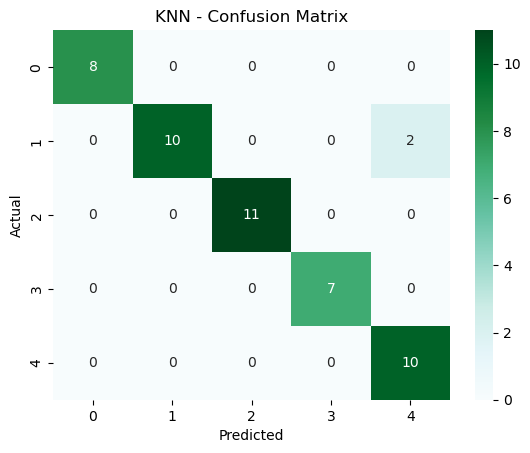

In [51]:
print("KNN Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='BuGn')
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###### Support Vector Machine

SVM Evaluation:
Accuracy: 0.9791666666666666
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         7
           4       0.91      1.00      0.95        10

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



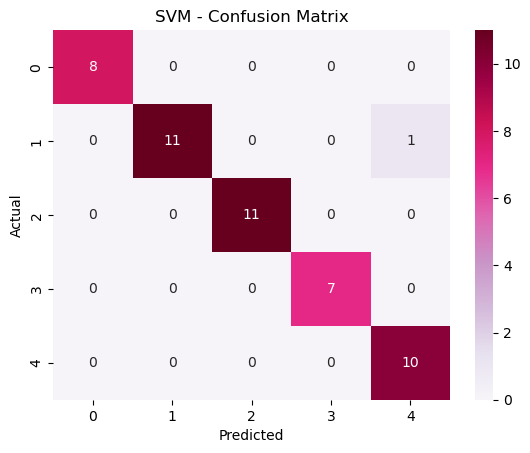

In [52]:
print("SVM Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='PuRd')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

*****Model Comparision*****

###### Comparing the accuracies of all the models:

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svc = accuracy_score(y_test, y_pred_svc)

In [55]:
# Accuracy dictionary
accuracy_scores = {
    'Logistic Regression': acc_lr,
    'Random Forest': acc_rf,
    'KNN': acc_knn,
    'SVM': acc_svc
}

###### Plot for comparision of accuracies of different models:

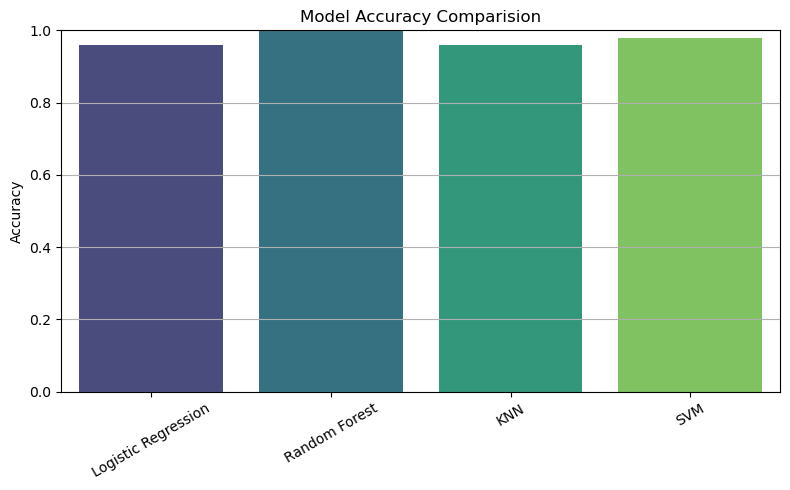

In [56]:
plt.figure(figsize = (8,5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()),
            hue=list(accuracy_scores.keys()), palette='viridis', legend=False)
plt.title('Model Accuracy Comparision')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation = 30)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

###### Creating a table(DataFrame) view for all models' performance:

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 📊 Collect metrics for each model
model_names = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM']

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svc = accuracy_score(y_test, y_pred_svc)


# Precision (macro avg)
prec_lr = precision_score(y_test, y_pred_lr, average='macro')
prec_rf = precision_score(y_test, y_pred_rf, average='macro')
prec_knn = precision_score(y_test, y_pred_knn, average='macro')
prec_svc = precision_score(y_test, y_pred_svc, average='macro')


# Recall (macro avg)
rec_lr = recall_score(y_test, y_pred_lr, average='macro')
rec_rf = recall_score(y_test, y_pred_rf, average='macro')
rec_knn = recall_score(y_test, y_pred_knn, average='macro')
rec_svc = recall_score(y_test, y_pred_svc, average='macro')


# F1-score (macro avg)
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
f1_svc = f1_score(y_test, y_pred_svc, average='macro')


###### Creating Performance Table as DataFrame:

In [58]:
import pandas as pd

# Data
data = {
    'Accuracy': [acc_lr, acc_rf, acc_knn, acc_svc],
    'Precision': [prec_lr, prec_rf, prec_knn, prec_svc],
    'Recall': [rec_lr, rec_rf, rec_knn, rec_svc],
    'F1 Score': [f1_lr, f1_rf, f1_knn, f1_svc]
}

# DataFrame
performance_df = pd.DataFrame(data, index=model_names)
performance_df = performance_df.round(4)  # Round for clean display


# Display
print(performance_df)


                     Accuracy  Precision  Recall  F1 Score
Logistic Regression    0.9583     0.9667  0.9667    0.9636
Random Forest          1.0000     1.0000  1.0000    1.0000
KNN                    0.9583     0.9667  0.9667    0.9636
SVM                    0.9792     0.9818  0.9833    0.9818


*****Model Selection*****

###### Checking for generalization using cross-validation:

In [59]:
# ✅ Check if scores are perfect
if acc_rf == 1.0 and prec_rf == 1.0 and rec_rf == 1.0 and f1_rf == 1.0:
    print("🎯 Random Forest gives perfect scores on test data.")

🎯 Random Forest gives perfect scores on test data.


In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
# ✅ Confirm generalization with cross-validation
rf_cv_scores = cross_val_score(rf, x, y, cv=5)
print("\n🔁 Cross-Validation Accuracy Scores:", rf_cv_scores)
print("✅ CV Mean Accuracy:", np.mean(rf_cv_scores).round(4))
print("📉 CV Std Deviation:", np.std(rf_cv_scores).round(4))


🔁 Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
✅ CV Mean Accuracy: 1.0
📉 CV Std Deviation: 0.0


In [62]:
# ✅ Final recommendation
print("\n✅ Best Model (Performance): Random Forest")
print("💡 Use this if you care most about accuracy.")
print("🚀 Ideal for final deployment if generalization is confirmed via cross-validation.")


✅ Best Model (Performance): Random Forest
💡 Use this if you care most about accuracy.
🚀 Ideal for final deployment if generalization is confirmed via cross-validation.


*****Finally, "Random Forest Classifier" is selected as the best model due to its perfect accuracy and strong generalization*****

In [65]:
avacado

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,0,34,175,261,4
1,71.7,53,69,75,2,69,206,185,3
2,88.5,60,94,46,1,79,220,143,2
3,93.8,105,87,41,1,75,299,140,2
4,42.5,303,58,32,3,63,200,227,0
...,...,...,...,...,...,...,...,...,...
235,17.4,24,36,12,0,35,193,289,4
236,54.7,327,51,51,3,58,229,191,0
237,15.0,13,53,12,0,32,194,293,4
238,90.5,73,76,66,1,73,234,125,2


In [68]:
print(avacado['ripeness'].value_counts())

ripeness
3    49
1    49
4    48
2    48
0    46
Name: count, dtype: int64
